In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# IMPORTING ALL DEPENDENCIES


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
from nltk.corpus import stopwords
# from nltk import word_tokenize
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.text import Tokenizer
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D, Embedding, LSTM, multiply
from keras.models import Model
from keras import preprocessing, Input
import os
import itertools
import numpy as np
from PIL import Image, ImageFile

Using TensorFlow backend.


In [ ]:
# Importing necessary libraries
import keras
import h5py
from keras import optimizers
from keras.models import load_model
from keras.layers import Bidirectional
#from Multimodal_baseline_Functions import *
from keras.layers.core import Reshape, Dropout
from keras.utils.vis_utils import plot_model
import os
# import keras_metrics
import matplotlib.pyplot as plt
from keras.layers import Conv1D, MaxPooling1D, Flatten, GlobalAveragePooling3D
from keras import regularizers
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.metrics import confusion_matrix
from keras import regularizers  
from keras.applications.inception_v3 import InceptionV3

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# AFTER DOWNLOADING STOPWORDS FROM NLTK
STOPWORDS = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
EMAIL = re.compile('^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})$')
STOPWORDS = set(stopwords.words('english'))

In [ ]:
# For vectors
maxlen = 1000

# AFTER EXTRACTING FILES FROM THE DATA LINK



1.   data/img FOLDER
2.   train.jsonl
3.   dev.jsonl
4.   test.jsonl



assigning the file path 


In [ ]:
Training_path = "/content/drive/My Drive/data/train.jsonl"
Validation_path = "/content/drive/My Drive/data/dev.jsonl"
Testing_path = "/content/drive/My Drive/data/test.jsonl"
img_dir = "/content/drive/My Drive/data/img"

# Downloading the Glove Embeddings

In [ ]:
!wget "http://nlp.stanford.edu/data/glove.6B.zip"

--2020-07-01 07:26:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-07-01 07:26:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-07-01 07:26:46--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
#unzipping the downloaded glove embeddings
!unzip "/content/glove.6B.zip"

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


### Embedding of 50 d is taken.
@glove.6B.50d.txt

In [ ]:
EMBEDDING_DIM = 50

In [ ]:
!python -m pip install json-lines

In [ ]:
import json_lines
from tqdm import tqdm_notebook as tqdm

In [ ]:
d = []

In [ ]:
import json_lines

with open('/content/drive/My Drive/data/train.jsonl', 'rb') as f: # opening file in binary(rb) mode    
    for item in json_lines.reader(f):
        d.append(item)

Train.jsonl to dataframe df

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df.shape

(8500, 4)

In [ ]:
df.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."



Similarly For other .jsonl files

In [ ]:
d1 = []

In [ ]:
import json_lines

with open('/content/drive/My Drive/data/dev.jsonl', 'rb') as f: # opening file in binary(rb) mode    
    for item in json_lines.reader(f):
        d1.append(item)

In [ ]:
d2 = []

In [ ]:
import json_lines

with open('/content/drive/My Drive/data/test.jsonl', 'rb') as f: # opening file in binary(rb) mode    
    for item in json_lines.reader(f):
        d2.append(item)

In [ ]:
df2 = pd.DataFrame(d2)

In [ ]:
df2.head(3)

,id,img,text
0,16395,img/16395.png,handjobs sold seperately
1,37405,img/37405.png,introducing fidget spinner for women
2,94180,img/94180.png,happy pride month let's go beat up lesbians


Converting dev.jsonl file to dataframe df1

In [ ]:
df1 = pd.DataFrame(d1)

In [ ]:
df1.head()

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime


In [ ]:
df1.shape

(500, 4)

In [ ]:
df.shape

(8500, 4)

In [ ]:
df2.shape

(1000, 3)

In [ ]:
#target label i.e column index 2 
y = df.iloc[:,2]

In [ ]:
#target label i.e column index 2 
y1 = df1.iloc[:,2]

In [ ]:
#img and text column
X = df[['img','text']]

In [ ]:
X1 = df1[['img','text']]

In [ ]:
X2 = df2[['img','text']]

In [ ]:
X1.head(2)

,img,text
0,img/08291.png,white people is this a shooting range
1,img/46971.png,bravery at its finest


In [ ]:
X.head(2)

,img,text
0,img/42953.png,its their character not their color that matters
1,img/23058.png,don't be afraid to love again everyone is not ...


In [ ]:
X_train = X
X_dev = X1
y_train = y
y_dev = y1
X_test = X2

In [ ]:
print("Shape of X_train       :   ", X_train.shape)
print("Shape of y_train       :   ", y_train.shape)
print("Shape of X_dev         :   ", X_dev.shape)
print("Shape of y_dev         :   ", y_dev.shape)
print("Shape of X_test        :   ", X_test.shape)

Shape of X_train       :    (8500, 2)
Shape of y_train       :    (8500,)
Shape of X_dev         :    (500, 2)
Shape of y_dev         :    (500,)
Shape of X_test        :    (1000, 2)


# Creating list of Image Paths from img column in dataframe



In [ ]:
def create_img_path(DF):
    img_path = ['/content/drive/My Drive/data' + '/' + name for name in DF['img']]
    return img_path

In [ ]:
train_img_path = create_img_path(df)

In [ ]:
dev_img_path = create_img_path(df1)

In [ ]:
test_img_path = create_img_path(df2)

# Cleaning the text 

In [ ]:

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()
    text = EMAIL.sub('', text)
#     text = NUMBERS.sub('',text)
    text = REPLACE_BY_SPACE_RE.sub(' ',text)
    text = BAD_SYMBOLS_RE.sub('',text)    
    text = text.replace('x','')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    
    return text

In [ ]:
# Processing the text
X_train['text'] = X_train['text'].apply(clean_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_dev['text'] = X_dev['text'].apply(clean_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test['text'] =  X_test['text'].apply(clean_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_train.head()

,img,text
0,img/42953.png,character color matters
1,img/23058.png,dont afraid love everyone like e
2,img/13894.png,putting bows pet
3,img/37408.png,love everything everybody ecept squirrels hate...
4,img/82403.png,everybody loves chocolate chip cookies even hi...


In [ ]:
X_dev.head()

,img,text
0,img/08291.png,white people shooting range
1,img/46971.png,bravery finest
2,img/03745.png,order comes 3750 white privilege discount brin...
3,img/83745.png,time send parasites back desert
4,img/80243.png,mississippi wind chime


In [ ]:
X_test.head()

,img,text
0,img/16395.png,handjobs sold seperately
1,img/37405.png,introducing fidget spinner women
2,img/94180.png,happy pride month lets go beat lesbians
3,img/54321.png,laughs majority us crime rate
4,img/97015.png,finds 72 virgins goats


In [ ]:
# Vectorising text
# process the whole observation into single list
train_text_list= list(X_train['text'])
dev_text_list  =  list(X_dev['text'])
test_text_list = list(X_test['text'])

In [ ]:
# Creating vectors for train, test, validation
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(train_text_list)
sequences_train = tokenizer.texts_to_sequences(train_text_list)
sequences_test = tokenizer.texts_to_sequences(test_text_list)
sequences_dev = tokenizer.texts_to_sequences(dev_text_list)

In [ ]:
x_train = preprocessing.sequence.pad_sequences(sequences_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(sequences_test, maxlen=maxlen)
x_dev = preprocessing.sequence.pad_sequences(sequences_dev, maxlen=maxlen)

In [ ]:
# Function that returns image reading from the path
def get_input(path):
    # Loading image from given path
    # and resizing it to 224*224*3 format
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img = image.load_img(path, target_size=(224,224))    
    return(img)

# Takes in image and preprocess it
def process_input(img):
    # Converting image to array    
    img_data = image.img_to_array(img)
    # Adding one more dimension to array    
    img_data = np.expand_dims(img_data, axis=0)
    #     
    img_data = preprocess_input(img_data)
    return(img_data)


In [ ]:
list(y_train).count(0)

5450

In [ ]:
list(y_train).count(1)

3050

## reading the embedding glove 50d file to vocab and its w2v 

In [ ]:
def read_data(file_name):
  #Opening file
    with open(file_name,'r', encoding="utf8") as f:
      #Creating empty set and dictonary for vocab and word respectively
        word_vocab = set() 
        word2vector = {}
        #Iterating over each line of file
        for line in f:
            #Spliting lines
            line_ = line.strip() 
            #Splitting words
            words_Vec = line_.split()            
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

In [ ]:
vocab, w2v = read_data( "/content/glove.6B.50d.txt")

In [ ]:
word_index = tokenizer.word_index
num_tokens = len(word_index)

In [ ]:

#Creating embeddding weight matrix
embedding_matrix = np.zeros((num_tokens + 1, EMBEDDING_DIM))

for word, i in word_index.items():
    embedding_vector = w2v.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
#Creating embedded layer using embedded matrix as weight matrix
embedding_layer = Embedding(num_tokens + 1, EMBEDDING_DIM, weights=[embedding_matrix], trainable = False)

In [ ]:
num_tokens

8950

In [ ]:
batch_idxs = list(range(len(x_train)))
padded_seq = x_train
batch_input = [] # Initializing batch input
batch_output = [] # Initializing batch output
        
        # Traversing through the batch indexes
for batch_idx in batch_idxs:
    input = padded_seq[batch_idx] # selecting padded sequences from the batch
    output = y[batch_idx] # Selecting label            
    batch_input.append(input) # Appending the input (text vector)
    batch_output.append(output) # Appending the label
        
        # Return a tuple of (input,output) to feed the network
batch_x = np.array( batch_input )
batch_y = np.array( batch_output )

In [ ]:
batch_idxs = list(range(len(x_dev)))
padded_seq = x_dev
batch_input = [] # Initializing batch input
batch_output = [] # Initializing batch output
        
        # Traversing through the batch indexes
for batch_idx in batch_idxs:
    input = padded_seq[batch_idx] # selecting padded sequences from the batch
    output = y[batch_idx] # Selecting label            
    batch_input.append(input) # Appending the input (text vector)
    batch_output.append(output) # Appending the label
        
        # Return a tuple of (input,output) to feed the network
batch_val_x = np.array( batch_input )
batch_val_y = np.array( batch_output )

##text model

In [ ]:
# Defining input layer
main_input = Input(shape=(maxlen,), dtype='int32', name='main_input')

# Defining embedding layer which will encode the input sequence
embedded_sequences = embedding_layer(main_input)
# x = Embedding(output_dim=512, input_dim=10000, input_length=maxlen)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = (Bidirectional(LSTM(32)))(embedded_sequences)

# Output of text model
txt_out = Dense(1, activation='sigmoid',name='dense_TXT')(lstm_out)

In [ ]:
txt_model = Model(inputs = [main_input], outputs=txt_out)

In [ ]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999,  decay=0.0, amsgrad=False)

In [ ]:
txt_model.compile(loss='binary_crossentropy', optimizer=adam, metrics = ["accuracy"])

In [ ]:
# Training image model
txt_model.fit(batch_x, batch_y,batch_size=50,
          epochs=7,
          validation_data=[batch_val_x, batch_val_y])

Train on 8500 samples, validate on 500 samples
Epoch 1/7
8500/8500 [==============================] - 812s 95ms/step - loss: 0.6328 - accuracy: 0.6600 - val_loss: 0.6223 - val_accuracy: 0.6900
Epoch 2/7
8500/8500 [==============================] - 816s 96ms/step - loss: 0.5977 - accuracy: 0.6882 - val_loss: 0.6246 - val_accuracy: 0.6980
Epoch 3/7
8500/8500 [==============================] - 802s 94ms/step - loss: 0.5878 - accuracy: 0.7001 - val_loss: 0.6430 - val_accuracy: 0.6900
Epoch 4/7
8500/8500 [==============================] - 810s 95ms/step - loss: 0.5810 - accuracy: 0.7058 - val_loss: 0.6454 - val_accuracy: 0.6780
Epoch 5/7
8500/8500 [==============================] - 807s 95ms/step - loss: 0.5730 - accuracy: 0.7131 - val_loss: 0.6568 - val_accuracy: 0.6640
Epoch 6/7
8500/8500 [==============================] - 808s 95ms/step - loss: 0.5674 - accuracy: 0.7185 - val_loss: 0.6765 - val_accuracy: 0.6360
Epoch 7/7
8500/8500 [==============================] - 816s 96ms/step - loss:

In [ ]:
txt_model.save('/content/drive/My Drive/meme_proj/BiLSTM_txt_model.h5')

##Image model

In [ ]:
# Function to get the output
# returns an array of labels
def get_output(path,label_file=None):
    # Spliting the path and take out the image id    
    filename = 'img/' + path.split('/')[-1]
    # Taking list of labels
    labels = list(label_file[label_file['img'] == filename]['label'].values)
    # for duplicate selecting labels
    if len(labels) <= 2:
        label = labels[0]
    elif len(labels) > 2:
        uni_label = list(set(labels))
        count_label = [labels.count(lab) for lab in uni_label]
        lab_idx = count_label.index(max(count_label))
        label = uni_label[lab_idx]
    return label

In [ ]:
idxs = list(range(len(train_img_path)))
idx = 0
    
batch_paths = train_img_path
#         batch_paths = np.random.choice(a = files, size = batch_size)
batch_input = [] # Batch input initialization
batch_output = [] # Batch output initialization
          
    # Read in each input, perform preprocessing and get labels    
for input_path in batch_paths:
    input = get_input(input_path ) # Load image
    output = get_output(input_path, df) # Load label of the image
    input = process_input(img=input) # Process the image
    batch_input.append(input[0]) # Append the image
    batch_output.append(output)  # Append the label
            
        # Return a tuple of (input,output) to feed the network
batch_x = np.array( batch_input )
batch_y = np.array( batch_output )

In [ ]:
len(dev_img_path)

500

In [ ]:
batch_paths = dev_img_path
#batch_paths = np.random.choice(a = files, size = batch_size)
batch_input = [] # Batch input initialization
batch_output = [] # Batch output initialization

In [ ]:
# Read in each input, perform preprocessing and get labels    
for input_path in batch_paths:
    input = get_input(input_path ) # Load image
    output = get_output(input_path, df1) # Load label of the image
    input = process_input(img=input) # Process the image
    batch_input.append(input[0]) # Append the image
    batch_output.append(output)  # Append the label
            
# Return a tuple of (input,output) to feed the network
batch_val_x = np.array( batch_input )
batch_val_y = np.array( batch_output )

In [ ]:
# create base model with imagenet weights
pre_trained_image_model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
def Image_model(base_model):
    # Freezing all the trainable layers
    for layer in base_model.layers:
        layer.trainable = False

    # Creating output layer
    x = base_model.output
    # Adding pooling layer before the output
    x = GlobalAveragePooling2D()(x)
    return x

In [ ]:
# Building img_prediction layer using Image_model
base_img = Image_model(pre_trained_image_model)
#x = dropout1(base_img)
img_prediction_layer = Dense(1, activation='sigmoid')(base_img)

In [ ]:
# Defining image model
img_model = Model(inputs = [pre_trained_image_model.input], outputs=img_prediction_layer)

In [ ]:
# Plotting image model
plot_model(img_model, to_file='VGG16_img_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compiling image model
img_model.compile(loss='binary_crossentropy', optimizer=adam, metrics = ["accuracy"])

In [ ]:
# Training image model
img_model.fit(batch_x, batch_y,batch_size=50,
          epochs=7,
          validation_data=[batch_val_x, batch_val_y])


Train on 8500 samples, validate on 500 samples
Epoch 1/7
8500/8500 [==============================] - 96s 11ms/step - loss: 1.3211 - accuracy: 0.5618 - val_loss: 1.2952 - val_accuracy: 0.5300
Epoch 2/7
8500/8500 [==============================] - 87s 10ms/step - loss: 0.9149 - accuracy: 0.6011 - val_loss: 1.0016 - val_accuracy: 0.5320
Epoch 3/7
8500/8500 [==============================] - 87s 10ms/step - loss: 0.7755 - accuracy: 0.6173 - val_loss: 0.9246 - val_accuracy: 0.5220
Epoch 4/7
8500/8500 [==============================] - 87s 10ms/step - loss: 0.7062 - accuracy: 0.6313 - val_loss: 0.8826 - val_accuracy: 0.5240
Epoch 5/7
8500/8500 [==============================] - 87s 10ms/step - loss: 0.6699 - accuracy: 0.6419 - val_loss: 0.8409 - val_accuracy: 0.5220
Epoch 6/7
8500/8500 [==============================] - 87s 10ms/step - loss: 0.6524 - accuracy: 0.6485 - val_loss: 0.8350 - val_accuracy: 0.5080
Epoch 7/7
8500/8500 [==============================] - 87s 10ms/step - loss: 0.6332

In [ ]:
# Saving image model
img_model.save('/content/drive/My Drive/meme_proj/VGG16_img_model.h5')

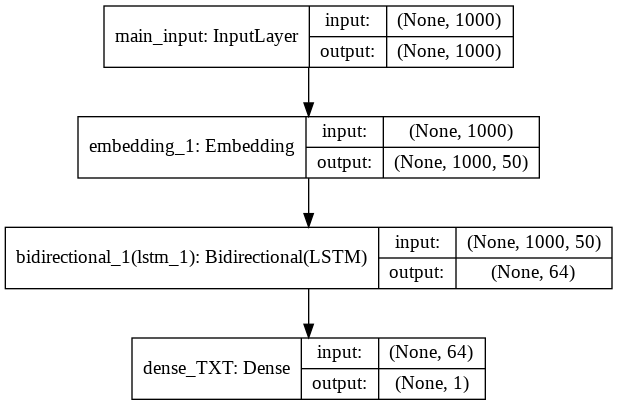

In [ ]:
# Plotting image model
plot_model(txt_model, to_file='/content/drive/My Drive/meme_proj/BiLSTM_txt_model.png', show_shapes=True, show_layer_names=True)

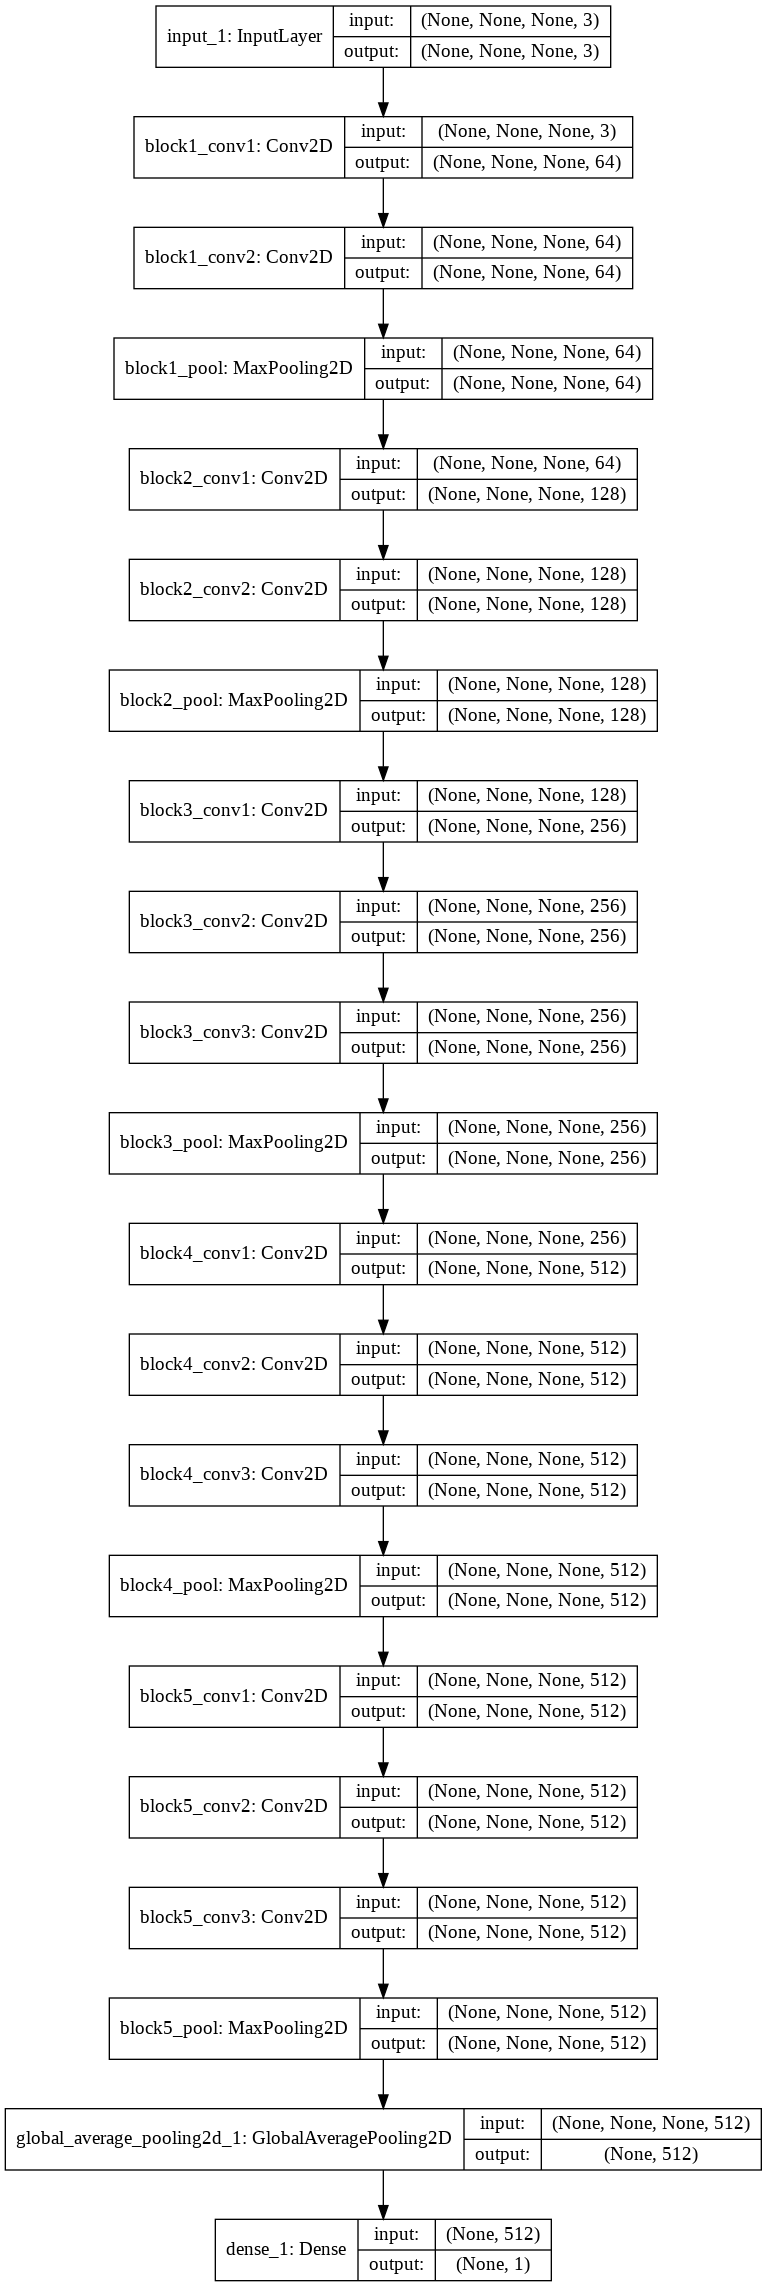

In [ ]:
# Plotting image model
plot_model(img_model, to_file='VGG16_img_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Loading pretrained image model from previous experiment
img_model = load_model('/content/drive/My Drive/meme_proj/VGG16_img_model.h5')

In [ ]:
txt_model = load_model('/content/drive/My Drive/meme_proj/BiLSTM_txt_model.h5')

#here batch_'....' means all at once

In [ ]:
files = train_img_path
padded_seq = x_train
y = y_train



batch_idxs = list(range(len(padded_seq)))     
batch_input_txt = [] # Initializing  input text
batch_input_img = [] # Initializing  input image
batch_output = [] # Initializing  output
        
# Traversing through the batch indexes
for batch_idx in batch_idxs:
    input_txt = padded_seq[batch_idx] # selecting padded sequences from the batch
    output = y[batch_idx] # Selecting label  
    input_img = get_input(files[batch_idx])
    input_img = process_input(input_img)
    batch_input_txt.append(input_txt) # Appending the input (text vector)
    batch_input_img.append(input_img[0])
    batch_output.append(output) # Appending the label
        
# Return a tuple of (input,output) to feed the network
batch_x1 = np.array( batch_input_img )
batch_x2 = np.array( batch_input_txt )
batch_y = np.array( batch_output )


In [ ]:
# img_text_generator(train_img_path, x_train, y_train, batch_size=32)
 # img_text_generator(files, padded_seq, y, batch_size=None):

files = dev_img_path
padded_seq = x_dev
y = y_dev



batch_idxs = list(range(len(padded_seq))) #Selecting the random batch indexes    
batch_input_txt = [] # Initializing batch input text
batch_input_img = [] # Initializing batch input image
batch_output = [] # Initializing batch output
        
# Traversing through the batch indexes
for batch_idx in batch_idxs:
    input_txt = padded_seq[batch_idx] # selecting padded sequences from the batch
    output = y[batch_idx] # Selecting label  
    input_img = get_input(files[batch_idx])
    input_img = process_input(input_img)
    batch_input_txt.append(input_txt) # Appending the input (text vector)
    batch_input_img.append(input_img[0])
    batch_output.append(output) # Appending the label
        
# Return a tuple of (input,output) to feed the network
batch_xval1 = np.array( batch_input_img )
batch_xval2 = np.array( batch_input_txt )
batch_yval  = np.array( batch_output )


# Now concatinating both output of txt and image model

In [ ]:
# Concatenating the output
con_layer = keras.layers.concatenate([txt_model.output, img_model.output])
#x1 = dropout2(con_layer)

In [ ]:
out = Dense(1,activation='sigmoid',name='densecom')(con_layer)

In [ ]:
# Defining model input and output
com_model = Model(inputs = [img_model.input, txt_model.input], outputs=out)

In [ ]:
# Using Stochastic gradient descent with optimizer
sgd = optimizers.SGD(lr=0.01 , momentum=0.9, nesterov=True)
com_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics = ["accuracy"])

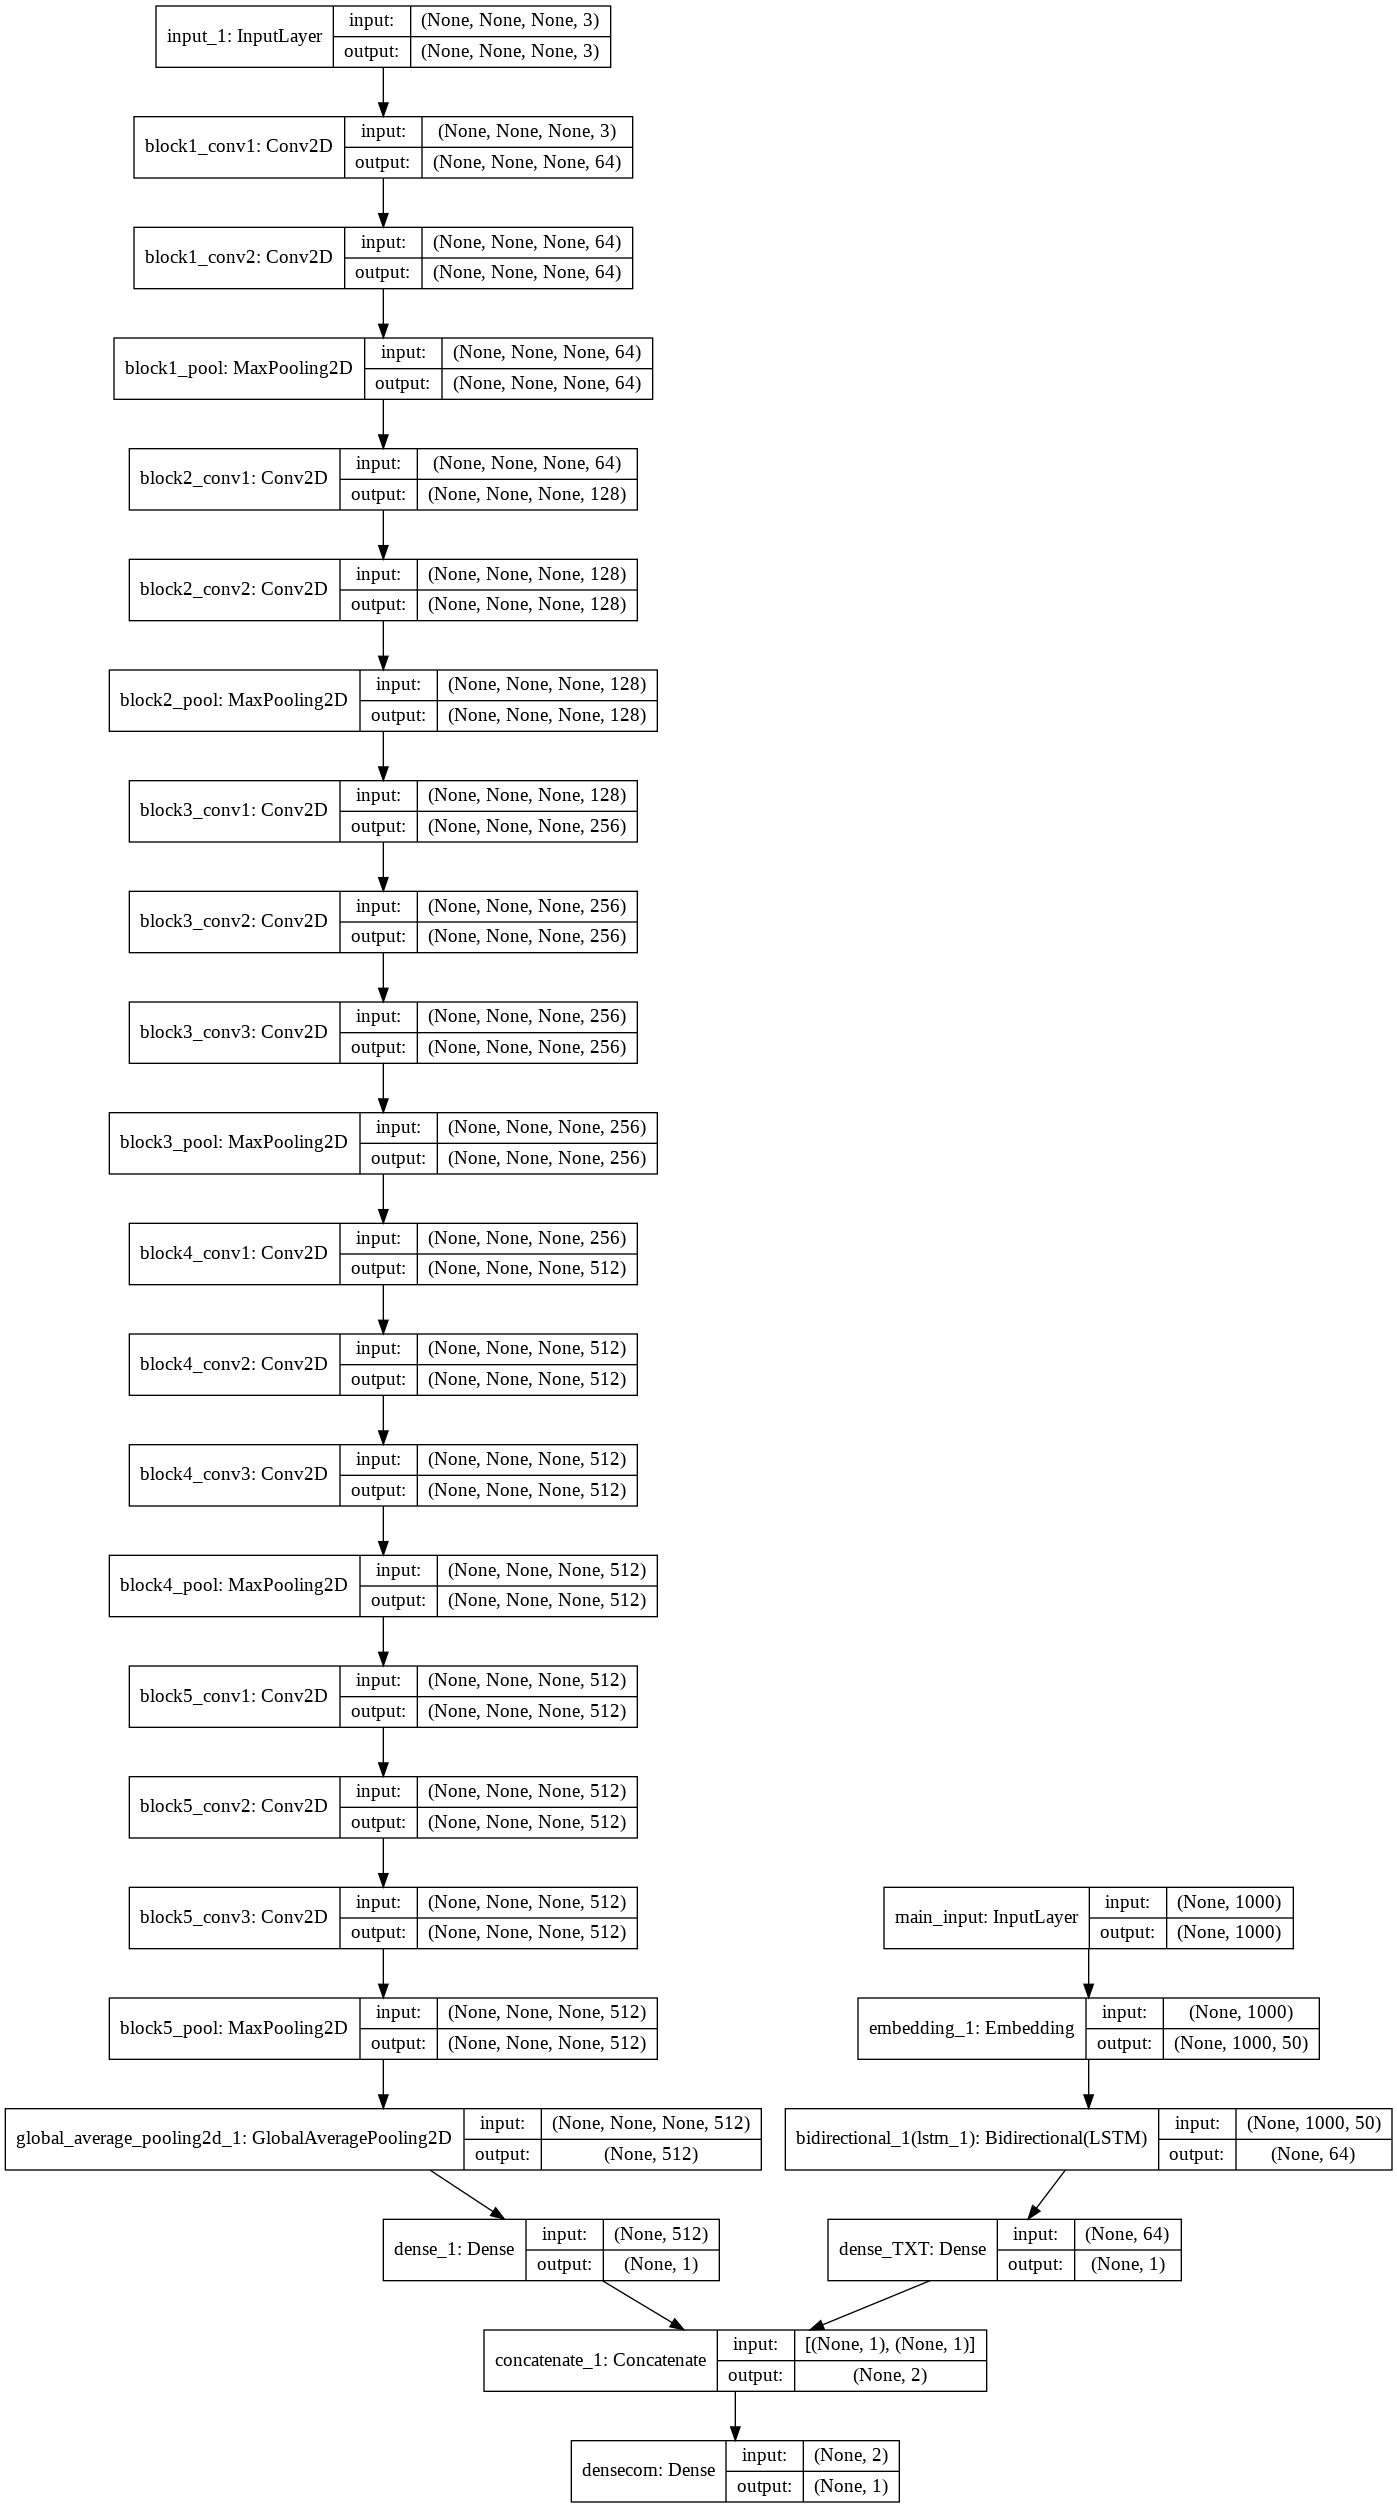

In [ ]:
# Plot the model
plot_model(com_model, to_file='/content/drive/My Drive/meme_proj/BiLSTM_VGG_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Training model
com_model.fit([batch_x1, batch_x2], batch_y, batch_size=50, epochs=7, validation_data=[[batch_xval1,batch_xval2], batch_yval], shuffle=False)

Train on 8500 samples, validate on 500 samples
Epoch 1/7
8500/8500 [==============================] - 780s 92ms/step - loss: 0.6354 - accuracy: 0.6398 - val_loss: 0.7095 - val_accuracy: 0.5060
Epoch 2/7
8500/8500 [==============================] - 776s 91ms/step - loss: 0.6044 - accuracy: 0.6878 - val_loss: 0.7045 - val_accuracy: 0.5480
Epoch 3/7
8500/8500 [==============================] - 761s 90ms/step - loss: 0.5860 - accuracy: 0.7121 - val_loss: 0.7025 - val_accuracy: 0.5500
Epoch 4/7
8500/8500 [==============================] - 773s 91ms/step - loss: 0.5758 - accuracy: 0.7202 - val_loss: 0.7018 - val_accuracy: 0.5480
Epoch 5/7
8500/8500 [==============================] - 764s 90ms/step - loss: 0.5695 - accuracy: 0.7240 - val_loss: 0.7008 - val_accuracy: 0.5540
Epoch 6/7
8500/8500 [==============================] - 758s 89ms/step - loss: 0.5653 - accuracy: 0.7259 - val_loss: 0.6999 - val_accuracy: 0.5540
Epoch 7/7
8500/8500 [==============================] - 751s 88ms/step - loss:

In [ ]:
#SAVE MODEL
com_model.save('/content/drive/My Drive/com_model.h5')

In [ ]:
com_model=load_model('/content/drive/My Drive/com_model.h5')

In [ ]:
imgs = list(X_test['img'])

In [ ]:
k = [ x.split('/')[-1]  for x in imgs]

In [ ]:
pp  = [x.split('.')[0] for x in k]

In [ ]:
pp[0:5]

['16395', '37405', '94180', '54321', '97015']

In [ ]:
files = test_img_path
padded_seq = x_test


batch_idxs = list(range(len(padded_seq)))     
batch_input_txt = [] # Initializing  input text
batch_input_img = [] # Initializing  input image
        
# Traversing through the batch indexes
for batch_idx in batch_idxs:
    input_txt = padded_seq[batch_idx] # selecting padded sequences from the batch
      
    input_img = get_input(files[batch_idx])
    input_img = process_input(input_img)
    batch_input_txt.append(input_txt) # Appending the input (text vector)
    batch_input_img.append(input_img[0])
    
# Return a tuple of (input,output) to feed the network
batch_x1 = np.array( batch_input_img )
batch_x2 = np.array( batch_input_txt )

In [ ]:
y_pred_com = com_model.predict([batch_x1,batch_x2])

In [ ]:
y_pred_com[0:5]


array([[0.3330325],
       [0.5793704],
       [0.6746079],
       [0.305456 ],
       [0.5047741]], dtype=float32)

In [ ]:
y_pred = y_pred_com.ravel()

In [ ]:
y_pred[0:5]

array([0.3330325, 0.5793704, 0.6746079, 0.305456 , 0.5047741],
      dtype=float32)

In [ ]:
y_pred_r = np.round(list(itertools.chain(*y_pred_com)))

In [ ]:
y_pred_r = y_pred_r.astype('int64')

In [ ]:
dtf = pd.DataFrame(list(zip(pp, y_pred,y_pred_r)), columns =['id', 'proba','label']) 

In [ ]:
dtf.head()

,id,proba,label
0,16395,0.333032,0
1,37405,0.579370,1
2,94180,0.674608,1
3,54321,0.305456,0
4,97015,0.504774,1


In [ ]:
dtf.to_csv('/content/drive/My Drive/meme_proj/meme_b.csv',sep=',',index = False)
